In [8]:
import numpy as np
from scipy.spatial.distance import cosine, euclidean, cityblock
from scipy.stats import pearsonr
from gensim.downloader import load
import matplotlib.pyplot as plt
from math import pi
import gensim.downloader as api

# Load pre-trained GloVe vectors
model = api.load("glove-wiki-gigaword-100")


In [34]:
hassan = np.array([9, 8, 7, 6, 7, 8, 6])
redbull = np.array([10, 9, 6, 7, 6, 9, 5])
ferrari = np.array([9, 7, 6, 6, 7, 7, 5])
mercedes = np.array([8, 6, 8, 9, 9, 5, 9])

teams = {'Red Bull': redbull, 'Ferrari': ferrari, 'Mercedes': mercedes}

In [35]:
print("Numerical Similarity Metrics:")
for name, team in teams.items():
    cos_sim = 1 - cosine(hassan, team)
    euc_dist = euclidean(hassan, team)
    man_dist = cityblock(hassan, team)
    
    print(f"\n{name}:")
    print(f"Cosine Similarity: {cos_sim:.4f}")
    print(f"Euclidean Distance: {euc_dist:.4f}")
    print(f"Manhattan Distance: {man_dist:.4f}")


Numerical Similarity Metrics:

Red Bull:
Cosine Similarity: 0.9918
Euclidean Distance: 2.6458
Manhattan Distance: 7.0000

Ferrari:
Cosine Similarity: 0.9973
Euclidean Distance: 2.0000
Manhattan Distance: 4.0000

Mercedes:
Cosine Similarity: 0.9564
Euclidean Distance: 6.0828
Manhattan Distance: 15.0000


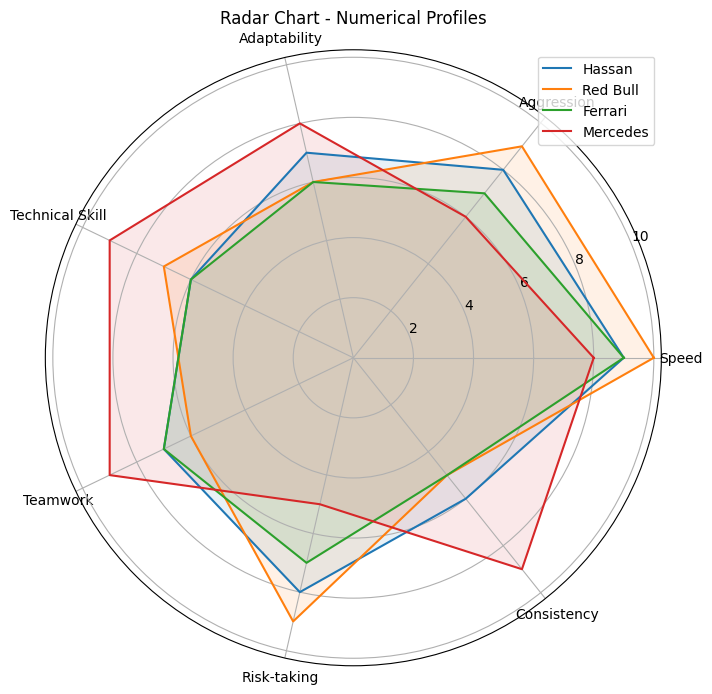

In [36]:
labels = ["Speed", "Aggression", "Adaptability", "Technical Skill", "Teamwork", "Risk-taking", "Consistency"]
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

def plot_star(name, values):
    values = values.tolist()
    values += values[:1]

    plt.polar(angles, values, label=name)
    plt.fill(angles, values, alpha=0.1)

plt.figure(figsize=(8, 8))
plot_star("Hassan", hassan)
for name, vec in teams.items():
    plot_star(name, vec)
plt.xticks(angles[:-1], labels)
plt.title("Radar Chart - Numerical Profiles")
plt.legend(loc='upper right')
plt.show()


In [37]:
# Trait profiles for each team
hassan_traits = ["speed", "aggression", "adaptability", "technical", "teamwork", "risk-taking", "consistency"]
redbull_traits = ["speed", "aggression", "adaptability", "technical", "teamwork", "risk-taking", "inconsistency"]
ferrari_traits = ["passion", "emotion", "adaptability", "technical", "teamwork", "risk-taking", "inconsistency"]
mercedes_traits = ["precision", "discipline", "adaptability", "technical", "teamwork", "control", "consistency"]

trait_profiles = {
    "Hassan": hassan_traits,
    "Red Bull": redbull_traits,
    "Ferrari": ferrari_traits,
    "Mercedes": mercedes_traits,
}

In [38]:
def get_mean_vector(traits):
    vectors = []
    for word in traits:
        if word in model:
            vectors.append(model[word])
        else:
            print(f"Word not found: {word}")
            vectors.append(np.zeros(100))
    return np.mean(vectors, axis=0)

embeddings = {name: get_mean_vector(traits) for name, traits in trait_profiles.items()}

In [39]:
print("Semantic Similarity (Cosine) using Word Embeddings:")
hassan_vec = embeddings["Hassan"]
for name in ["Red Bull", "Ferrari", "Mercedes"]:
    sim = 1 - cosine(hassan_vec, embeddings[name])
    print(f"{name}: Cosine Similarity = {sim:.4f}")

Semantic Similarity (Cosine) using Word Embeddings:
Red Bull: Cosine Similarity = 0.9783
Ferrari: Cosine Similarity = 0.8796
Mercedes: Cosine Similarity = 0.9120


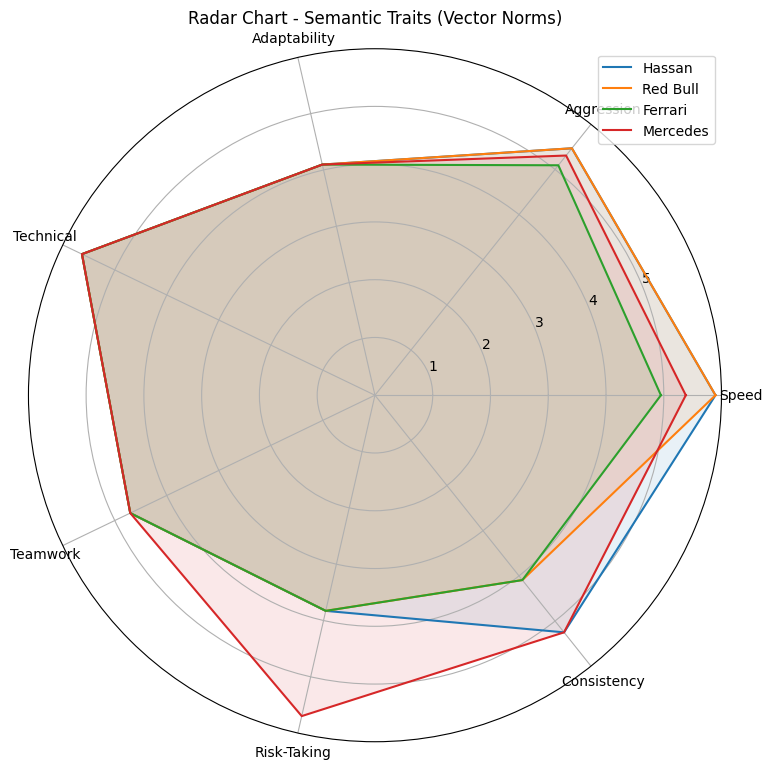

In [40]:
def plot_trait_star(name, traits):
    traits = [t.title() for t in traits]
    traits += traits[:1]
    
    angles = [n / float(len(traits)-1) * 2 * pi for n in range(len(traits))]
    
    values = [model[t.lower()] if t.lower() in model else np.zeros(100) for t in traits]
    norms = [np.linalg.norm(v) for v in values]
    
    plt.polar(angles, norms, label=name)
    plt.fill(angles, norms, alpha=0.1)

plt.figure(figsize=(9, 9))
plot_trait_star("Hassan", hassan_traits)
plot_trait_star("Red Bull", redbull_traits)
plot_trait_star("Ferrari", ferrari_traits)
plot_trait_star("Mercedes", mercedes_traits)
plt.xticks([n / float(7) * 2 * pi for n in range(7)], [l.title() for l in hassan_traits], fontsize=10)
plt.title("Radar Chart - Semantic Traits (Vector Norms)")
plt.legend(loc='upper right')
plt.show()


In [41]:
print("Final Recommendation:")
# Simple decision logic: Highest cosine similarity in word embedding space
scores = {name: 1 - cosine(hassan_vec, embeddings[name]) for name in ["Red Bull", "Ferrari", "Mercedes"]}
recommended_team = max(scores, key=scores.get)
print(f"Recommended Team for Hassan: {recommended_team}")

Final Recommendation:
Recommended Team for Hassan: Red Bull
